In [ ]:
# Data
import pandas as pd

data_path = "data/exam-iq.csv"
data = pd.read_csv(data_path)
print(data.head())

In [ ]:
from sklearn.svm import SVC 
import matplotlib.pyplot as plt
import numpy as np

# Features and target
X = data.drop(columns="Pass", axis=1)
y = data["Pass"]

# Iterate over different values of C and y
# For loop from 0 to 1 in 0.1 steps
for i in range(1):
    C = i + 1 / 10
    
    # SVC Model
    model = SVC(kernel="linear", C=C, gamma=1,random_state=42, probability=True)
    model.fit(X, y)

    # Plot the decision boundary
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    ax.scatter(X["Hours"], X["IQ"], c=y, cmap="viridis")

    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                            np.arange(y_min, y_max, 0.01))

    # Predict the class for each point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    ax.contourf(xx, yy, Z, alpha=0.8, cmap='winter', edgecolors='w')

    # Show the plot
    plt.show()


In [ ]:
# SVM with RBF kernel
# Iterate over different values of C
# For loop from 0 to 1 in 0.1 steps
for i in range(1):
    C = i + 1 / 10
    
    # SVC Model
    model = SVC(kernel="rbf", C=C, gamma=C,random_state=42, probability=True)
    model.fit(X, y)

    # Plot the decision boundary
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    ax.scatter(X["Hours"], X["IQ"], c=y, cmap="viridis")

    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                            np.arange(y_min, y_max, 0.01))

    # Predict the class for each point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    ax.contourf(xx, yy, Z, alpha=0.8, cmap='winter', edgecolors='w')

    # Show the plot
    plt.show()

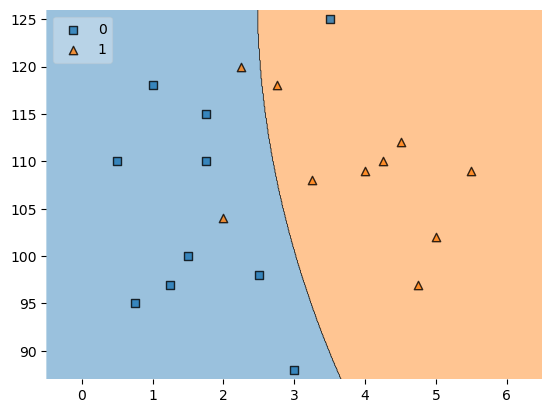

In [40]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Features and target
X = data.drop(columns="Pass", axis=1)
y = data["Pass"]

# Convert X to a numpy
X = X.to_numpy()
y = y.to_numpy()

# Plot decision regions for one model
#model = SVC(kernel="rbf", C=10, gamma=0.015, random_state=42)
# Pipeline with StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
model = make_pipeline(StandardScaler(), SVC(kernel="rbf", C=10, gamma=0.055, random_state=42))
model.fit(X, y)

# Make predictions on the test set
y_pred = model.predict(X)

# Calculate the accuracy score
accuracy = accuracy_score(y, y_pred)

plot_decision_regions(X, y, clf=model, legend=2)
